In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from scipy.linalg import lu_factor, lu_solve

In [2]:
data = pd.read_csv("HeightVsWeight.csv")
data = np.array(data)
print(data.shape)

x = data[:, 0]
y = data[:, 1]

print(x.shape)
print(y.shape)

n = 5
N = x.size

A = np.zeros((N, n+1))



(71, 2)
(71,)
(71,)


In [4]:
''' RISOLUZIONE CON EQUAZIONI NORMALI'''
ATA = np.dot(A.T, A) 
ATy = np.dot(A.T, y)

lu, piv = lu_factor(ATA)

alpha_normali = lu_solve((lu, piv), ATy)

''' RISOLUZIONE CON SVD '''

U, s, Vh = scipy.linalg.svd(A)

print('Shape of U:', U.shape)
print('Shape of s:', s.shape)
print('Shape of V:', Vh.T.shape)

alpha_svd = np.zeros(s.shape)

for i in range(n+1): 
	ui = U[:,i] #colonne della matrice U
	vi = Vh[i,:] #righe della matrice Vh
	alpha_svd = alpha_svd + (ui @ y) * vi/ s[i]

Shape of U: (71, 71)
Shape of s: (6,)
Shape of V: (6, 6)


C:\Users\sharo\AppData\Local\Temp\ipykernel_20592\2731487475.py:5: LinAlgWarning: Diagonal number 1 is exactly zero. Singular matrix.
  lu, piv = lu_factor(ATA)
C:\Users\sharo\AppData\Local\Temp\ipykernel_20592\2731487475.py:22: RuntimeWarning: divide by zero encountered in divide
  alpha_svd = alpha_svd + (ui @ y) * vi/ s[i]
C:\Users\sharo\AppData\Local\Temp\ipykernel_20592\2731487475.py:22: RuntimeWarning: invalid value encountered in divide
  alpha_svd = alpha_svd + (ui @ y) * vi/ s[i]


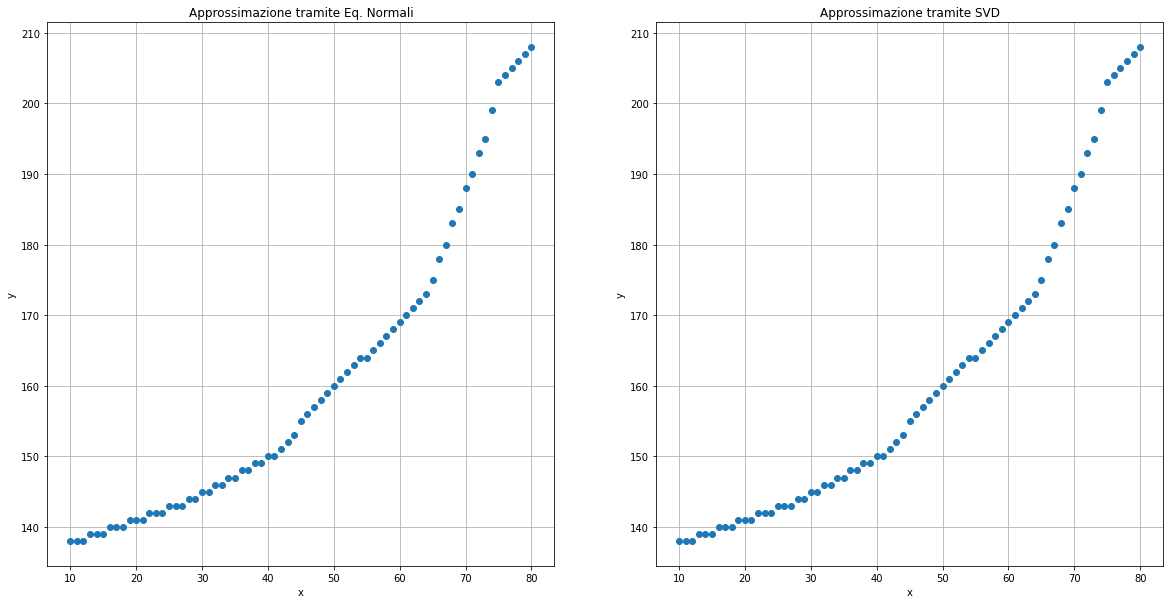

In [5]:
''' VISUALIZZAZIONE DEI RISULTATI '''

def p(alpha, x):
  N = len(x) #Numero dei dati passati come argomento
  n = len(alpha) #5 + 1 (poichè ^0 incluso)
  A = np.zeros((N,n))
  for i in range(n):
    A[:, i] = x ** i
  return A @ alpha  

x_plot = np.linspace(1, 3, 100)

y_normali = p(alpha_normali, x_plot)
y_svd = p(alpha_svd, x_plot)

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(x, y, 'o')
plt.plot(x_plot, y_normali, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Approssimazione tramite Eq. Normali')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(x, y, 'o')
plt.plot(x_plot, y_svd, 'k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Approssimazione tramite SVD')
plt.grid()

plt.show()